# FFT | Semana 4 clase 26-03
 La idea central de este experimento es explorar cómo afecta la relación entre la frecuencia de una señal senoidal y la resolución espectral del sistema de muestreo. Partimos de una señal de 1 Hz muestreada con N=1000 puntos y fs=1000 Hz, lo que nos da una resolución frecuencial Δf=1 Hz. En este caso ideal, la señal cumple perfectamente con la periodicidad de muestreo: capturamos exactamente un período completo en la ventana de observación de 1 segundo. Esto se refleja en el dominio frecuencial como un pico espectral nítido y concentrado a 1 Hz.

El problema surge cuando cambiamos la frecuencia de la señal a valores no enteros como 1.5 Hz, manteniendo los mismos parámetros de muestreo. Aquí ocurre un fenómeno fundamental: al no coincidir la frecuencia de la señal con la resolución espectral, la energía ya no se concentra en un solo bin de la FFT. En lugar de un pico bien definido, vemos cómo la potencia se distribuye entre múltiples bins adyacentes, efecto conocido como "fuga espectral". Esto ocurre porque la señal ya no es periódica en la ventana de muestreo.

Para una señal de 2 Hz con los mismos parámetros, observamos un comportamiento diferente. Aunque la frecuencia es mayor, al ser múltiplo entero de la resolución espectral (2 Hz = 2 × Δf), la energía vuelve a concentrarse en un pico bien definido. Sin embargo, esto nos lleva a otra consideración importante: al aumentar la frecuencia sin ajustar el muestreo, estamos comprimiendo más períodos de la señal en el mismo tiempo de observación, lo que puede afectar nuestra capacidad de análisis.

La clave está en entender que para frecuencias no enteras, la resolución espectral Δf=1 Hz resulta insuficiente. La condición fundamental para evitar la fuga espectral es que la frecuencia de la señal sea un múltiplo entero de Δf. Cuando esto no se cumple, como en el caso de 1.5 Hz, la FFT interpreta la señal como no periódica en la ventana de observación, distribuyendo su energía en el espectro.

La potencia de mi señal es:  1.0000000000000002
La resolución espectral es:  1.0


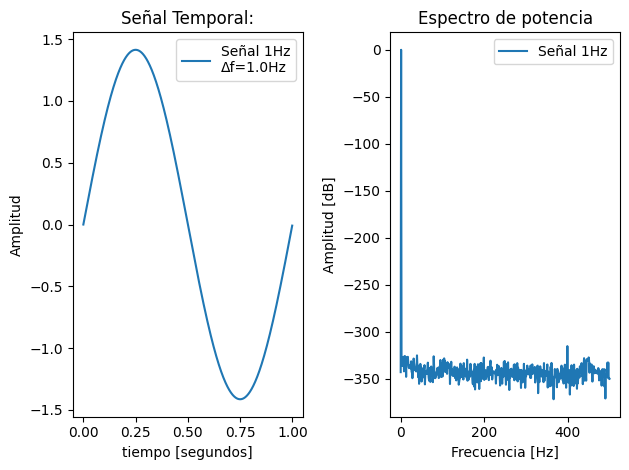

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def generador_sen(vmax, dc, ff, ph, nn, fs):
    '''
    Esta funcion genera una señal senoidal.
    descripcion de los parametros:
    vmax:amplitud max de la senoidal [Volts]
    dc:valor medio [Volts]
    ff:frecuencia [Hz]
    ph:fase en [rad]
    nn:cantidad de muestras
    fs:frecuencia de muestreo [Hz]
    '''
    Ts= 1/fs
    tt=np.linspace(0,(nn-1)*Ts,nn)
    xx=vmax*np.sin(2*np.pi*ff*tt+ph)+dc
    return tt, xx
    
N= 1000
fs = 1000
ff = 1
A_inicial = np.sqrt(2) 
tt, xx = generador_sen(A_inicial, 0, ff, 0, N, fs)
print ('La potencia de mi señal es: ',np.var(xx))
df=fs/N
print('La resolución espectral es: ',df)

plt.figure(1)
plt.subplot(1,2,1)
plt.plot(tt, xx, label=f'Señal {ff}Hz\nΔf={fs/N:.1f}Hz')
plt.legend(loc='upper right')
plt.title("Señal Temporal:")
plt.xlabel("tiempo [segundos]")
plt.ylabel("Amplitud")

plt.subplot(1,2,2)
ft_As = 1/N * np.fft.fft(xx)
ffx = np.linspace(0, (N-1)*ff, N) #eje frecuencial
bfrec = ffx <= fs/2
plt.plot( ffx[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='C0', ls='solid', label=f'Señal {ff}Hz' )
plt.legend(loc='upper right')
plt.title("Espectro de potencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [dB]")

plt.tight_layout()
plt.show()

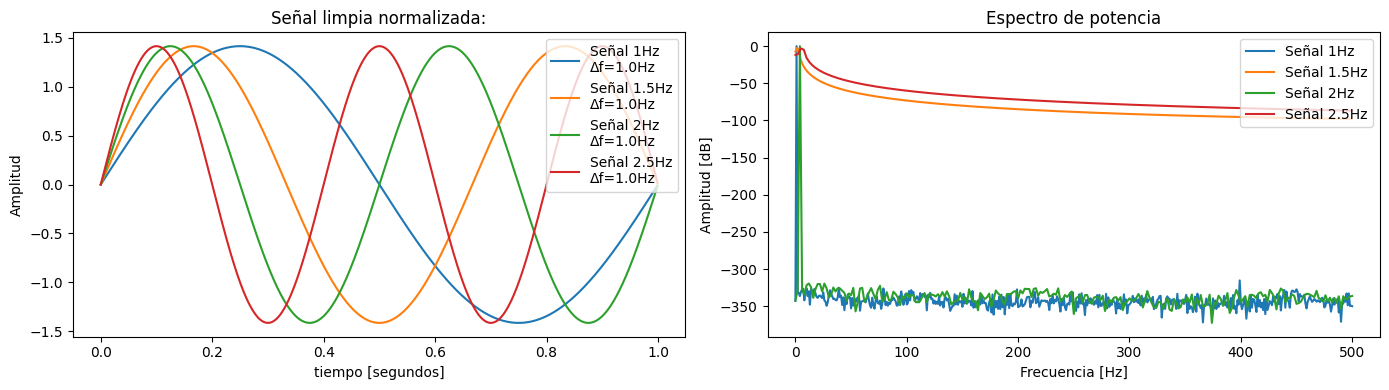

In [ ]:
N= 1000
fs = 1000
ff = [1, 1.5, 2, 2.5]
A_inicial = np.sqrt(2) 
tt_0, xx_0 = generador_sen(A_inicial, 0, ff[0], 0, N, fs)
tt_1, xx_1 = generador_sen(A_inicial, 0, ff[1], 0, N, fs)
tt_2, xx_2 = generador_sen(A_inicial, 0, ff[2], 0, N, fs)
tt_3, xx_3 = generador_sen(A_inicial, 0, ff[3], 0, N, fs)


plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(tt_0, xx_0, label=f'Señal {ff[0]}Hz\nΔf={fs/N:.1f}Hz', color = 'C0')
plt.plot(tt_1, xx_1, label=f'Señal {ff[1]}Hz\nΔf={fs/N:.1f}Hz', color = 'C1')   
plt.plot(tt_2, xx_2, label=f'Señal {ff[2]}Hz\nΔf={fs/N:.1f}Hz', color = 'C2')
plt.plot(tt_3, xx_3, label=f'Señal {ff[3]}Hz\nΔf={fs/N:.1f}Hz', color = 'C3')
plt.legend(loc='upper right')
plt.title("Señal limpia normalizada:")
plt.xlabel("tiempo [segundos]")
plt.ylabel("Amplitud")

##Frecuencial##
plt.subplot(1,2,2)
ft_As_0 = 1/N * np.fft.fft(xx_0)
ffx_0 = np.linspace(0, (N-1)*ff[0], N) #eje frecuencial
bfrec_0 = ffx_0 <= fs/2
plt.plot( ffx_0[bfrec_0], 10* np.log10(2*np.abs(ft_As_0[bfrec_0])**2), color='C0', ls='solid', label=f'Señal {ff[0]}Hz' )

ft_As_1 = 1/N * np.fft.fft(xx_1)
ffx_1 = np.linspace(0, (N-1)*ff[1], N) #eje frecuencial
bfrec_1 = ffx_1 <= fs/2
plt.plot( ffx_1[bfrec_1], 10* np.log10(2*np.abs(ft_As_1[bfrec_1])**2), color='C1', ls='solid', label=f'Señal {ff[1]}Hz' )

ft_As_2 = 1/N * np.fft.fft(xx_2)
ffx_2 = np.linspace(0, (N-1)*ff[2], N) #eje frecuencial
bfrec_2 = ffx_2 <= fs/2
plt.plot( ffx_2[bfrec_2], 10* np.log10(2*np.abs(ft_As_2[bfrec_2])**2), color='C2', ls='solid', label=f'Señal {ff[2]}Hz' )

ft_As_3 = 1/N * np.fft.fft(xx_3)
ffx_3 = np.linspace(0, (N-1)*ff[3], N) #eje frecuencial
bfrec_3 = ffx_3 <= fs/2
plt.plot( ffx_3[bfrec_3], 10* np.log10(2*np.abs(ft_As_3[bfrec_3])**2), color='C3', ls='solid', label=f'Señal {ff[3]}Hz' )

plt.legend(loc='upper right')
plt.title("Espectro de potencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [dB]")


plt.tight_layout()

plt.show()


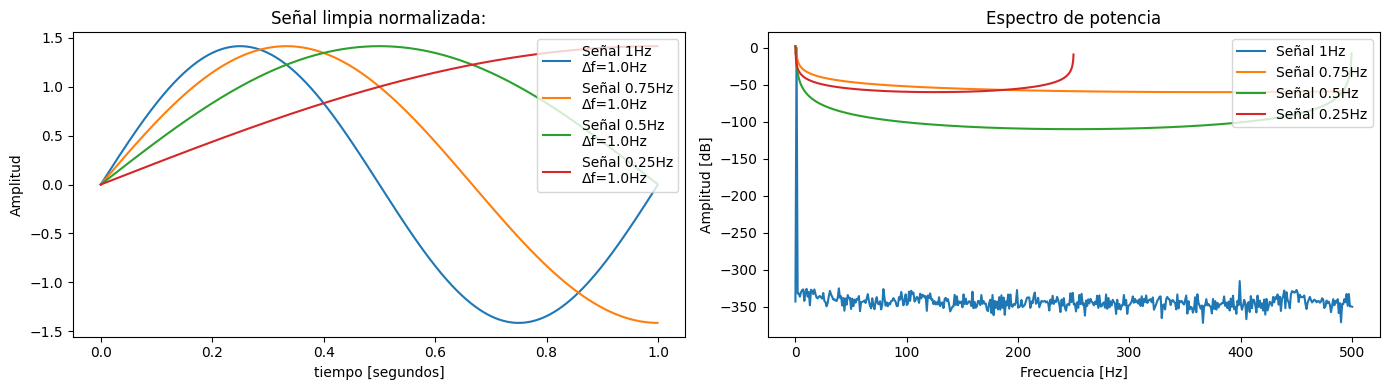

In [38]:
N= 1000
fs = 1000
ff = [1, 0.75, 0.5, 0.25]
A_inicial = np.sqrt(2) 
tt_0, xx_0 = generador_sen(A_inicial, 0, ff[0], 0, N, fs)
tt_1, xx_1 = generador_sen(A_inicial, 0, ff[1], 0, N, fs)
tt_2, xx_2 = generador_sen(A_inicial, 0, ff[2], 0, N, fs)
tt_3, xx_3 = generador_sen(A_inicial, 0, ff[3], 0, N, fs)


plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(tt_0, xx_0, label=f'Señal {ff[0]}Hz\nΔf={fs/N:.1f}Hz', color = 'C0')
plt.plot(tt_1, xx_1, label=f'Señal {ff[1]}Hz\nΔf={fs/N:.1f}Hz', color = 'C1')   
plt.plot(tt_2, xx_2, label=f'Señal {ff[2]}Hz\nΔf={fs/N:.1f}Hz', color = 'C2')
plt.plot(tt_3, xx_3, label=f'Señal {ff[3]}Hz\nΔf={fs/N:.1f}Hz', color = 'C3')
plt.legend(loc='upper right')
plt.title("Señal limpia normalizada:")
plt.xlabel("tiempo [segundos]")
plt.ylabel("Amplitud")

##Frecuencial##
plt.subplot(1,2,2)
ft_As_0 = 1/N * np.fft.fft(xx_0)
ffx_0 = np.linspace(0, (N-1)*ff[0], N) #eje frecuencial
bfrec_0 = ffx_0 <= fs/2
plt.plot( ffx_0[bfrec_0], 10* np.log10(2*np.abs(ft_As_0[bfrec_0])**2), color='C0', ls='solid', label=f'Señal {ff[0]}Hz' )

ft_As_1 = 1/N * np.fft.fft(xx_1)
ffx_1 = np.linspace(0, (N-1)*ff[1], N) #eje frecuencial
bfrec_1 = ffx_1 <= fs/2
plt.plot( ffx_1[bfrec_1], 10* np.log10(2*np.abs(ft_As_1[bfrec_1])**2), color='C1', ls='solid', label=f'Señal {ff[1]}Hz' )

ft_As_2 = 1/N * np.fft.fft(xx_2)
ffx_2 = np.linspace(0, (N-1)*ff[2], N) #eje frecuencial
bfrec_2 = ffx_2 <= fs/2
plt.plot( ffx_2[bfrec_2], 10* np.log10(2*np.abs(ft_As_2[bfrec_2])**2), color='C2', ls='solid', label=f'Señal {ff[2]}Hz' )

ft_As_3 = 1/N * np.fft.fft(xx_3)
ffx_3 = np.linspace(0, (N-1)*ff[3], N) #eje frecuencial
bfrec_3 = ffx_3 <= fs/2
plt.plot( ffx_3[bfrec_3], 10* np.log10(2*np.abs(ft_As_3[bfrec_3])**2), color='C3', ls='solid', label=f'Señal {ff[3]}Hz' )

plt.legend(loc='upper right')
plt.title("Espectro de potencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [dB]")


plt.tight_layout()

plt.show()